In [1]:
import os
import json
import random

import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

from PIL import Image
import numpy as np

In [2]:
def deg2rad(d):
    return d * np.pi / 180

def show_shpere_boxes(file_name, dataset_root="360indoor", H=960, W=1920, color = "yellow"):
    with open(f"{dataset_root}/annotations/{file_name}.json") as f:
        anno = json.load(f)
        
    img = Image.open(f"{dataset_root}/images/{file_name}.jpg")
    
    fig = plt.figure(figsize=(30, 15))
    ax = fig.add_subplot(111)
    plt.imshow(img)

    for box in anno['boxes']:
        lam0 = box[2]
        phi1 = box[3]
        w = deg2rad(box[4])
        h = deg2rad(box[5])

        x = np.vstack((np.linspace(-w/2,-w/2, box[4]),np.linspace(-w/2,w/2, box[4]),np.linspace(w/2,w/2, box[4]),np.linspace(w/2,-w/2, box[4])))
        y = np.vstack((np.linspace(h/2,-h/2, box[4]),np.linspace(-h/2,-h/2, box[4]),np.linspace(-h/2,h/2, box[4]),np.linspace(h/2,h/2, box[4])))

        rou = np.sqrt(x ** 2 + y ** 2)
        c = np.arctan(rou)
        sin_c = np.sin(c)
        cos_c = np.cos(c)

        phi = np.arcsin(cos_c * np.sin(phi1) + (y * sin_c * np.cos(phi1)) / rou)
        lam = lam0 + np.arctan2(x * sin_c, rou * np.cos(phi1) * cos_c - y * np.sin(phi1) * sin_c)

        e_x = lam * H / np.pi + W/2
        e_y = H/2 - phi * H / np.pi
        verts = np.hstack((e_x.reshape(-1,1),e_y.reshape(-1,1)))
        
        codes = np.empty(box[4]*4)
        codes.fill(Path.LINETO)
        codes[0]=Path.MOVETO
        # codes[59]=Path.CLOSEPOLY

        path = Path(verts, codes)
        patch = patches.PathPatch(path, fill=False, color=color, lw=2)
        ax.add_patch(patch)
        ax.text(verts[0][0], verts[0][1]-3, box[6],  color=color, fontsize=20)

    plt.show()

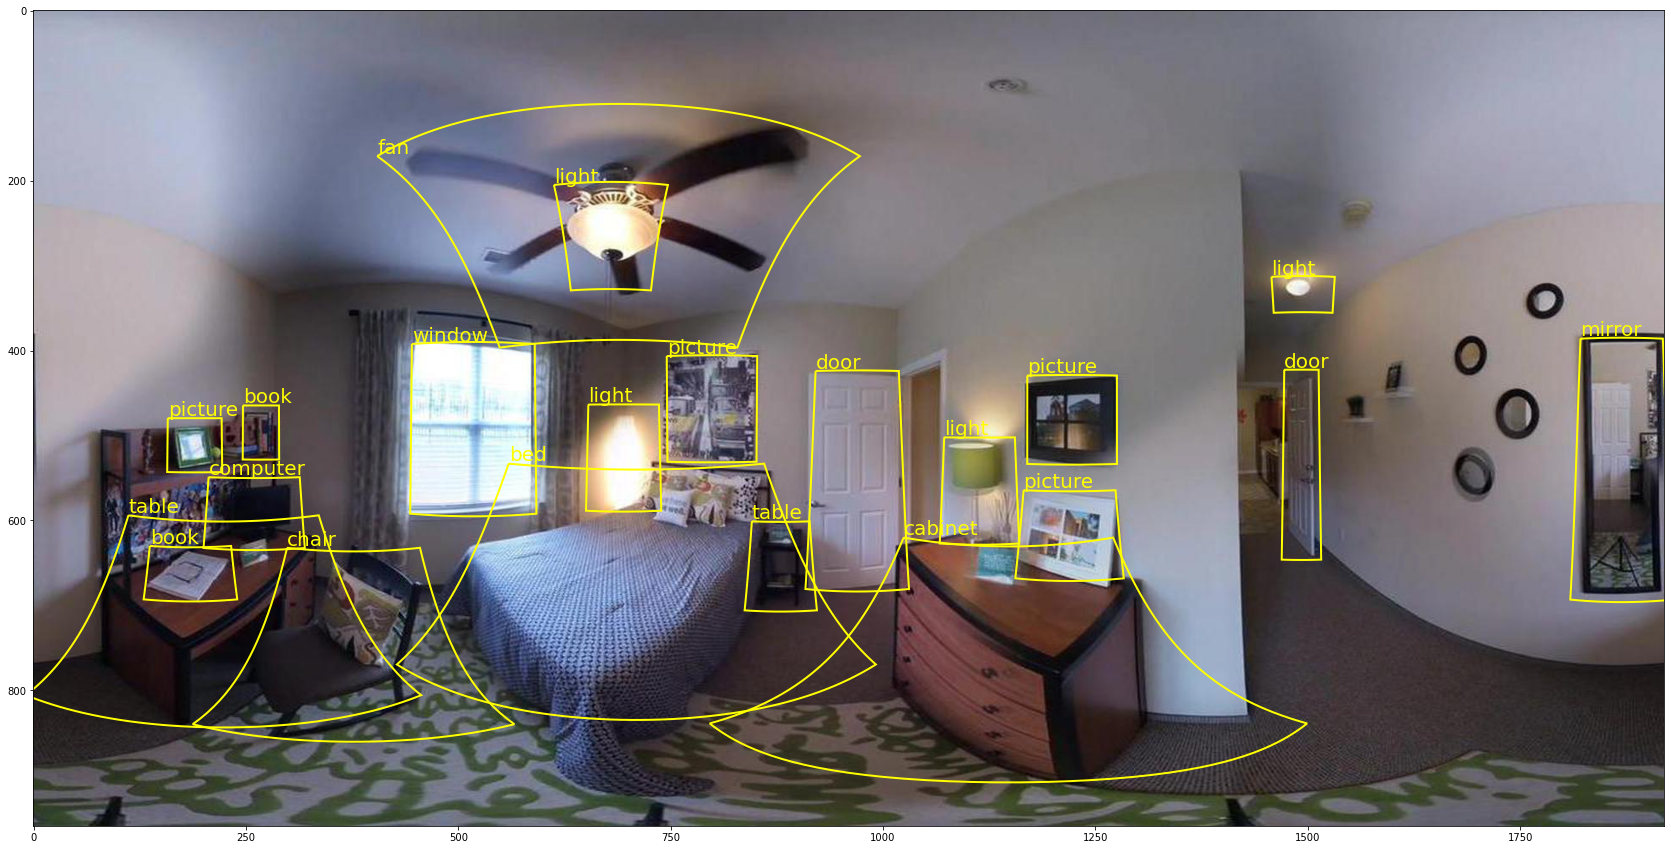

In [3]:
show_shpere_boxes("image_00278", dataset_root="example_data")